<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Projects-with-Python/blob/main/006_Previs%C3%A3o_de_S%C3%A9ries_Temporais_com_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão de Séries Temporais com ARIMA**

Previsão de séries temporais significa analisar e modelar dados de séries temporais para tomar decisões futuras. Algumas das aplicações da Previsão de Séries Temporais são previsão do tempo, previsão de vendas, previsão de negócios, previsão de preços de ações, etc. O modelo **ARIMA** é uma técnica estatística popular usada para ***Previsão de Séries Temporais***. Se você deseja aprender Previsão de Séries Temporais com ARIMA, este artigo é para você. Neste artigo, conduzirei você pela tarefa de previsão de séries temporais com ARIMA usando a linguagem de programação **Python**.

# **O que é ARIMA?**

ARIMA significa **Autoregressive Integrated Moving Average**. É um algoritmo usado para prever dados de séries temporais. Os modelos ARIMA têm três parâmetros como ARIMA(p, d, q). Aqui p, d e q são definidos como:

**p** é o número de valores defasados que precisam ser adicionados ou subtraídos dos valores (coluna de rótulo). Ele captura a parte autorregressiva do ARIMA.

**d** representa o número de vezes que os dados precisam se diferenciar para produzir um sinal estacionário. Se forem dados estacionários, o valor de d deve ser 0 e, se forem dados sazonais, o valor de d deve ser 1. d captura a parte integrada do ARIMA.

**q** é o número de valores defasados para o termo de erro adicionado ou subtraído dos valores (coluna de rótulo). Ele captura a parte da média móvel do ARIMA.
Espero que agora você tenha entendido o modelo ARIMA. Na seção abaixo, conduzirei você pela tarefa de previsão de séries temporais de preços de ações com ARIMA usando a linguagem de programação Python.

In [ ]:
pip install yfinance

In [4]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta

hoje       = date.today()
d1         = hoje.strftime( '%Y-%m-%d' )
data_fim   = d1

d2         = date.today() - timedelta(days=360)
d2         = d2.strftime( '%Y-%m-%d' )
data_inicio= d2

dados      = yf.download( 'GOOG', start=data_inicio, end=data_fim, progress=False)
print(dados.tail())


                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2023-02-17  95.070000  95.750000  93.449997  94.589996  94.589996  31074100
2023-02-21  93.239998  93.415001  92.000000  92.050003  92.050003  28367200
2023-02-22  91.933998  92.360001  90.870003  91.800003  91.800003  29891100
2023-02-23  92.129997  92.129997  90.010002  91.070000  91.070000  32423700
2023-02-24  89.629997  90.129997  88.860001  89.349998  89.349998  31276600


In [5]:
dados['Date'] = dados.index

campos = ['Date', 'Open', 'High', 'High', 'Close', 'Adj Close', 'Volume']
dados  = dados[ campos ]
dados.reset_index(drop=True, inplace=True)
print( dados.head() )


        Date        Open        High  ...       Close   Adj Close    Volume
0 2022-03-02  134.608246  135.615494  ...  134.751495  134.751495  23966000
1 2022-03-03  135.978500  136.713806  ...  134.307999  134.307999  19780000
2 2022-03-04  133.382507  134.199005  ...  132.121994  132.121994  24446000
3 2022-03-07  131.904007  131.904007  ...  126.464500  126.464500  39178000
4 2022-03-08  126.250504  131.246506  ...  127.278503  127.278503  35250000

[5 rows x 7 columns]


Precisamos apenas das colunas de data e preços de fechamento para o restante da tarefa, então vamos selecionar ambas as colunas e prosseguir:

In [6]:
dados = dados[ ['Date', 'Close' ] ]
print( dados.head() )

        Date       Close
0 2022-03-02  134.751495
1 2022-03-03  134.307999
2 2022-03-04  132.121994
3 2022-03-07  126.464500
4 2022-03-08  127.278503


Agora vamos visualizar os preços de fechamento do Google antes de seguir em frente:

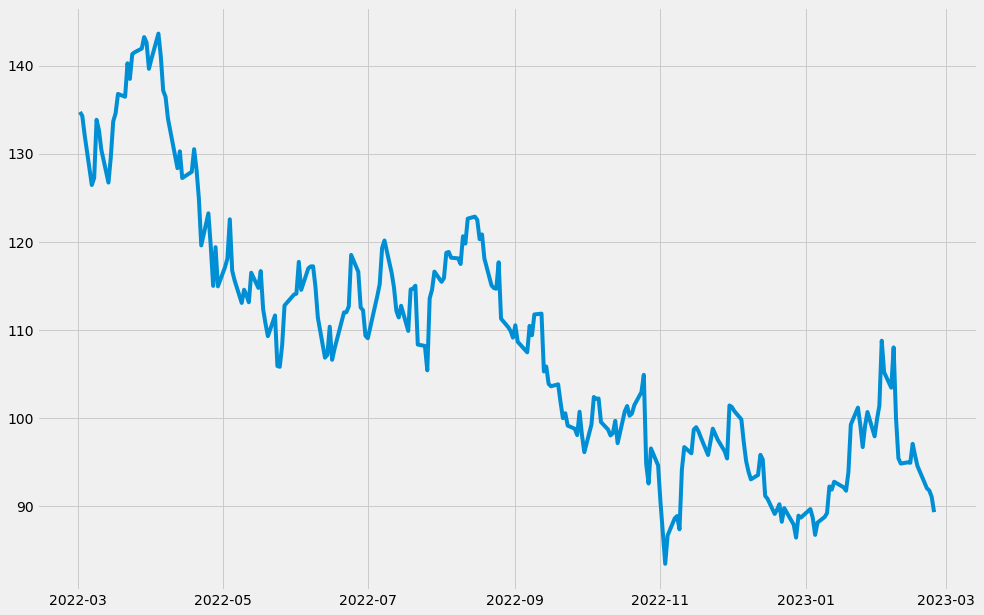

In [7]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.figure(figsize=(15,10))
plt.plot( dados['Date'], dados['Close'])

# **Usando o ARIMA para previsão de séries temporais**

Antes de usar o modelo ARIMA, precisamos descobrir se nossos dados são estacionários ou sazonais. O gráfico de visualização de dados sobre os preços de fechamento das ações acima mostra que nosso conjunto de dados não é estacionário. Para verificar se nosso conjunto de dados é estacionário ou sazonal adequadamente, podemos usar o método de decomposição sazonal que divide os dados da série temporal em tendência, sazonal e residual para uma melhor compreensão dos dados da série temporal:

<ipython-input-8-57515e8f48d5>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose( dados['Close'], model = 'multiplicative', freq=30)


<Figure size 432x288 with 0 Axes>

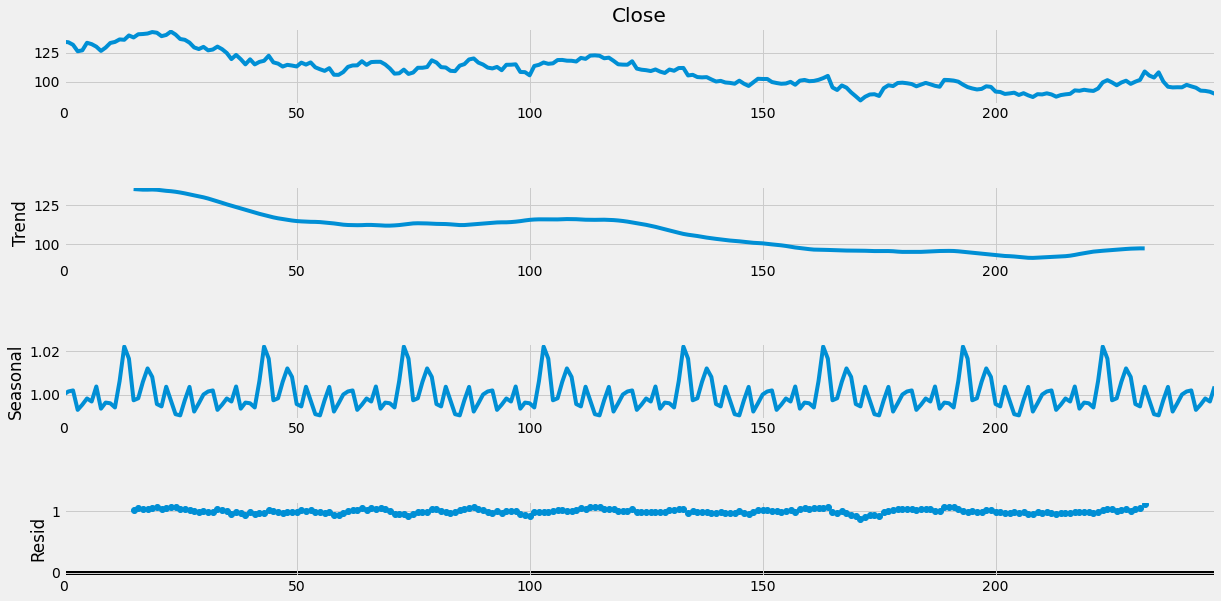

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose( dados['Close'], model = 'multiplicative', freq=30)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,10)

Portanto, nossos dados não são estacionários, são sazonais. Precisamos usar o modelo Seasonal ARIMA (SARIMA) para previsão de séries temporais nesses dados. Mas antes de usar o modelo SARIMA, usaremos o modelo ARIMA. Isso ajudará você a aprender usando os dois modelos.

Para usar **ARIMA** ou **SARIMA**, precisamos encontrar os valores **p**, **d** e **q**. Podemos encontrar o valor de p plotando a autocorrelação da coluna '**Close**' e o valor de q plotando o gráfico de autocorrelação parcial. O valor de d é 0 ou 1. Se os dados forem estacionários, devemos usar 0, e se os dados forem sazonais, devemos usar 1. Como nossos dados são sazonais, devemos usar 1 como valor de d.

Agora veja como encontrar o valor de p:

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

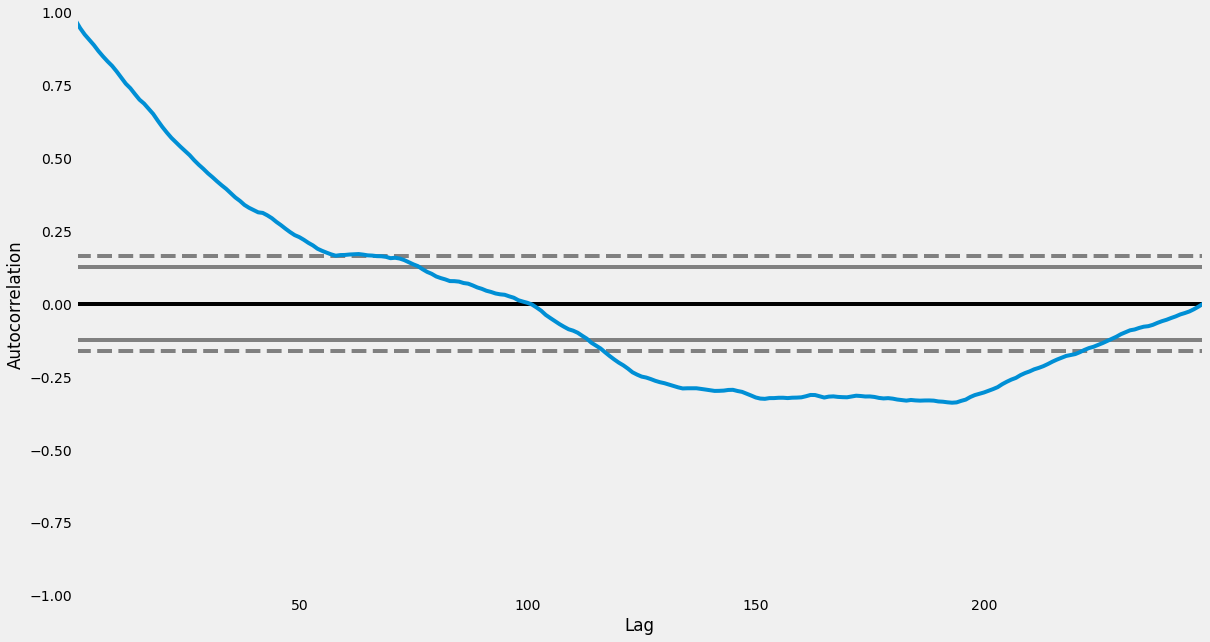

In [9]:
fig = plt.figure(figsize=(18,10))
pd.plotting.autocorrelation_plot( dados['Close'] )

No gráfico de autocorrelação acima, a curva está se movendo para ***baixo após a 5ª linha do primeiro limite***. É assim que se decide o valor-p. Portanto, o valor de **p é 5**. Agora vamos encontrar o **valor de q** (***média móvel***):

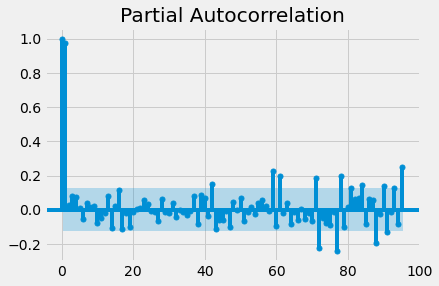

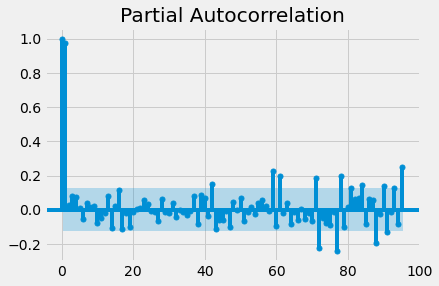

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(dados["Close"], lags = 95)

No gráfico de autocorrelação parcial acima, podemos ver que apenas ***dois pontos estão distantes de todos os pontos***. É assim que se decide o valor de q. Portanto, o valor de **q é 2**. Agora vamos construir um modelo ARIMA:

In [10]:
p, d, q = 5, 1, 2

from statsmodels.tsa.arima_model import ARIMA

modelo      = ARIMA( dados['Close'], order=(p, d, q))
treinamento = modelo.fit(disp=-1)
print(treinamento.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  247
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -594.678
Method:                       css-mle   S.D. of innovations              2.669
Date:                Sat, 25 Feb 2023   AIC                           1207.356
Time:                        17:50:49   BIC                           1238.941
Sample:                             1   HQIC                          1220.073
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1832      0.145     -1.267      0.205      -0.467       0.100
ar.L1.D.Close     0.7387      0.067     11.091      0.000       0.608       0.869
ar.L2.D.Close    -1.0251      0.079    -

Veja como prever os valores usando o modelo ARIMA:

In [11]:
predicoes = treinamento.predict()
print(predicoes)

2     -0.173420
3     -0.077438
4      0.248782
5      0.335192
6     -0.376788
         ...   
243   -0.692147
244   -0.565895
245    0.030104
246    0.379010
247    0.229302
Length: 246, dtype: float64


The predicted values are **wrong** because the **data is seasonal**. **ARIMA** model will never perform well on seasonal time series data. So, here’s how to build a **SARIMA** model:

In [14]:
import statsmodels.api as sm
import warnings

modelo = sm.tsa.statespace.SARIMAX( dados['Close'], order=(p, d, q), seasonal_order=(p, d, q, 12))
modelo = modelo.fit()

print(modelo.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  248
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -584.168
Date:                            Sat, 25 Feb 2023   AIC                           1198.336
Time:                                    17:58:11   BIC                           1250.230
Sample:                                         0   HQIC                          1219.257
                                            - 248                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0764      4.336      0.018      0.986      -8.421       8.574
ar.L2          0.7207      3.888   

Now let’s predict the future stock prices using the SARIMA model for the next 10 days:

In [21]:
predicoes = modelo.predict(len(dados), len(dados) + 10)
print(predicoes)

248    89.695975
249    88.736607
250    87.714374
251    87.740607
252    87.778542
253    88.028966
254    87.038503
255    86.222247
256    87.163846
257    87.817040
258    87.696030
Name: predicted_mean, dtype: float64


<AxesSubplot:>

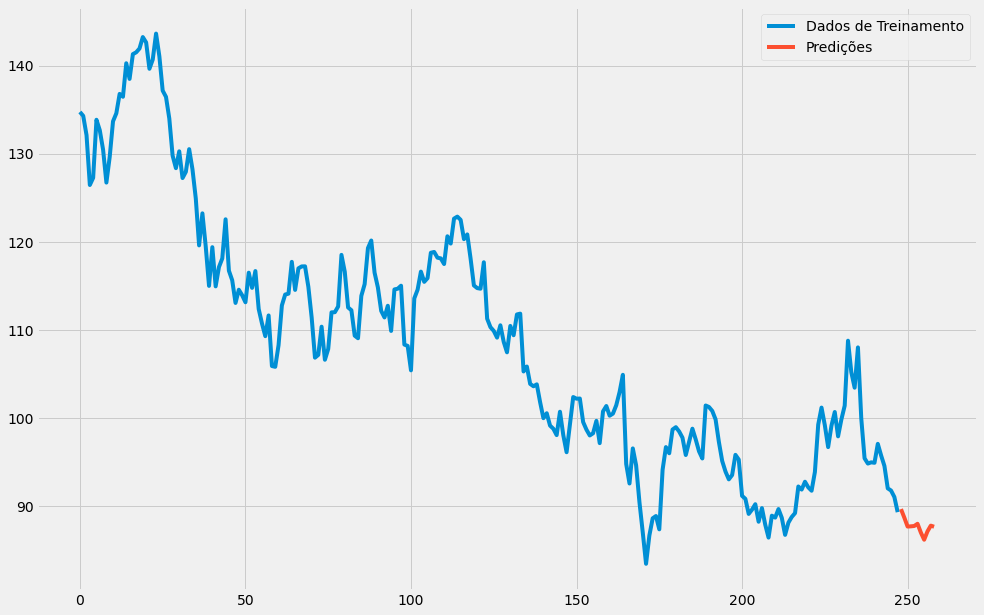

In [22]:
dados["Close"].plot( legend=True, label="Dados de Treinamento", figsize=(15, 10))
predicoes.plot( legend=True, label="Predições")